PROBLEM 1-1. K-MEANS ALGORITHM

In [ ]:
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn import datasets

In [ ]:
# Data loading
data = datasets.load_breast_cancer().data

In [ ]:
def k_means(data, k):
  centroids = data[np.random.choice(data.shape[0], size=k)] # Initializing first centroids at random points
  optimal = False
  while not optimal:
    old_centroids = np.copy(centroids)
    assignments = np.argmin(np.square(np.linalg.norm(data - centroids[:, None], axis=2)), axis=0)
    for i in range(k):
      points_in_cluster = data[np.where(assignments == i)[0]] # Only keeps the data assigned to the cluster in question
      centroids[i] = np.mean(points_in_cluster, axis=0) # Actually changing that centroid to the mean of x's assigned to it
    compare = centroids == old_centroids # If old centroid locations are equal to the new centroid locations, optima has been reached, break
    optimal = compare.all()
  return centroids, assignments

I also made a k-means directly using the distortion function as well, but they both ended up working and I like the above one better so I used it in the later steps.

In [ ]:
# K means, but using the distortion instead of checking if they moved (got simiar results with both)
def k_means2(data, k):
  centroids = data[np.random.choice(data.shape[0], size=k)] # Initializing first centroids at random points
  while True:
    old_centroids = np.copy(centroids)
    assignments = np.argmin(np.square(np.linalg.norm(data - centroids[:, None], axis=2)), axis=0)
    j = j_calc(k, centroids, assignments)
    sum = 0
    for i in range(k):
      points_in_cluster = data[np.where(assignments == i)[0]] # Only keeps the data assigned to the cluster in question
      centroids[i] = np.mean(points_in_cluster, axis=0) # Actually changing that centroid to the mean of x's assigned to it
    new_j = j_calc(k, centroids, assignments)
    if (new_j >= j):
      return old_centroids, assignments

In [ ]:
def j_calc(k, centroids, assignments):
  sum = 0
  for i in range(k):
    points_in_cluster = data[np.where(assignments == i)[0]]
    dist = np.square(np.linalg.norm(points_in_cluster - centroids[i], axis=0))
    sum += np.sum(dist)
  return sum/data.shape[0]

PROBLEM 1-2: RUNNING K-MEANS FOR VALUES OF K VARYING BETWEEN 2 AND 7, AT INCREMENTS OF 1. JUSTIFY WHICH DATA YOU PASSED AS INPUT TO K-MEANS.

In [ ]:
for k in range(2, 8, 1):
  cent, ass = k_means(data, k)
  print("k =", k)
  print("Centroid Locations")
  print(cent)
  print("Cluster Assignments")
  print(ass)

k = 2
Centroid Locations
[[1.93799237e+01 2.16945802e+01 1.28231298e+02 1.18592977e+03
  1.01294580e-01 1.48612977e-01 1.76939466e-01 1.00698779e-01
  1.91539695e-01 6.06029008e-02 7.42803817e-01 1.22253817e+00
  5.25058015e+00 9.56781679e+01 6.59868702e-03 3.21766947e-02
  4.24197710e-02 1.56739847e-02 2.03039695e-02 3.95338931e-03
  2.37094656e+01 2.89126718e+01 1.58496183e+02 1.75302290e+03
  1.40424733e-01 3.57757710e-01 4.49306107e-01 1.92431069e-01
  3.11881679e-01 8.61654962e-02]
 [1.25562991e+01 1.85703653e+01 8.11234703e+01 4.96061872e+02
  9.48844977e-02 9.10998174e-02 6.24377642e-02 3.34325434e-02
  1.78057991e-01 6.34540183e-02 3.04190868e-01 1.21515320e+00
  2.15288059e+00 2.37852922e+01 7.17326256e-03 2.34746895e-02
  2.87455128e-02 1.06363242e-02 2.06135799e-02 3.74750297e-03
  1.40439018e+01 2.47095434e+01 9.19375114e+01 6.19647945e+02
  1.29959110e-01 2.23311758e-01 2.19214947e-01 9.13298425e-02
  2.83553653e-01 8.32819406e-02]]
Cluster Assignments
[0 0 0 1 0 1 0 1 1 1

The data I passed into the k-means function were the datapoints of the breast cancer set, and the number of clusters, k, in which I wanted to group the data.
Breast cancer data points were numpy arrays of shape (569,30).
The dataset also included various categories such as target_label, target, filename, etc. But since k-means is an unsupervised learning algorithm, labels were unnecessary; the only input needed is the raw data (.data).
I decided to include all 569 data points, because I think that having a larger set is important.

PROBLEM 1-3: PLOTTING THE DISTORTION (J)

In [ ]:
j = []
for k in range(2,8,1):
  centroids, assignments = k_means(data, k)
  sum = 0
  # Summing along each of the cenroids and the clusters that belong to it
  for x in range(k):
    points_in_cluster = data[np.where(assignments == x)[0]]
    dist = np.square(np.linalg.norm(points_in_cluster - centroids[x], axis=0))
    sum += np.sum(dist)

  j.append(sum/data.shape[0])

Text(0, 0.5, 'Distortion')

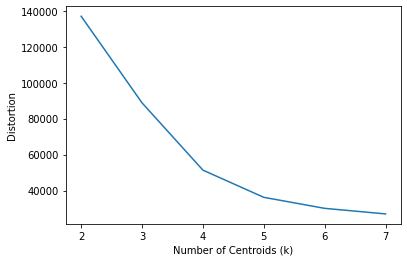

In [ ]:
plt.plot([2,3,4,5,6,7], j)
plt.xlabel('Number of Centroids (k)')
plt.ylabel('Distortion')

PROBLEM 1-4:
Based on the method of choosing described in lecture, I should find the inflection point on the graph, after which the distortion won't decrease by much. Basing my choice on this, I would pick k=5. Distortion decreases rapidly until 4, and then continues to decrease substantially until k=5, at which point the rate of change of distortion significantly decreases.
Since the dataset depicts various characteristics present in the cell nuclei of breast mass, it's important to find a value of k that forms groups of high similarity in order to differentiate between different forms the cancer could take on, while not having too many unnecessary categories.

PLOTTING IN 2D FOR A SANITY CHECK

In [ ]:
def k_means_plotting(data, k):
  centroids = data[np.random.choice(data.shape[0], size=k)] # Initializing first centroids at random points
  optimal = False
  while not optimal:
    old_centroids = np.copy(centroids)
    assignments = np.argmin(np.square(np.linalg.norm(data - centroids[:, None], axis=2)), axis=0)
    plt.figure()
    plot(data, assignments, centroids, k)
    for i in range(k):
      points_in_cluster = data[np.where(assignments == i)[0]] # Only keeps the data assigned to the cluster in question
      centroids[i] = np.mean(points_in_cluster, axis=0) # Actually changing that centroid to the mean of x's assigned to it
    compare = centroids == old_centroids # If old centroid locations are equal to the new centroid locations, optima has been reached, break
    optimal = compare.all()
  return centroids, assignments

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

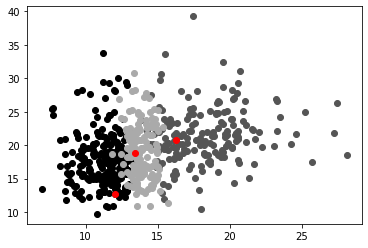

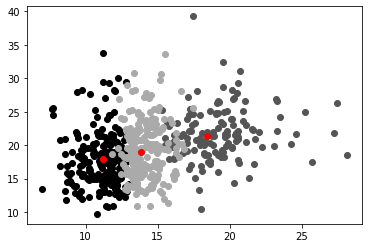

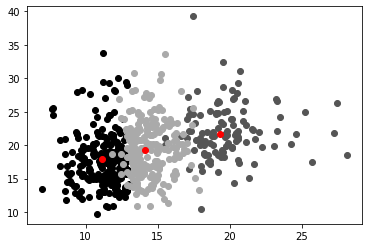

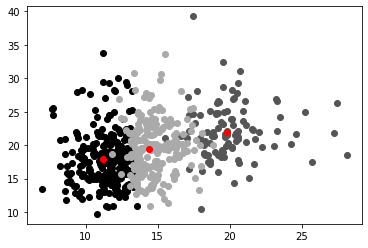

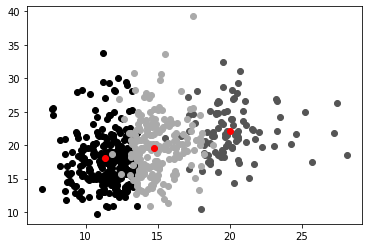

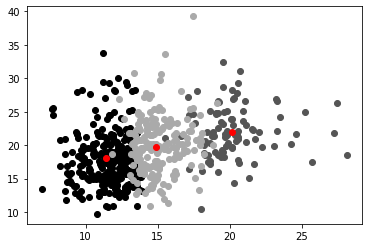

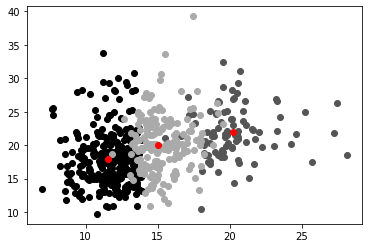

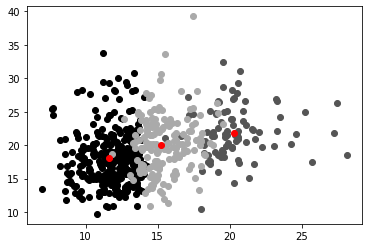

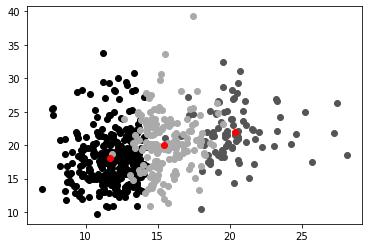

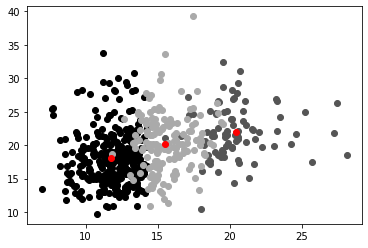

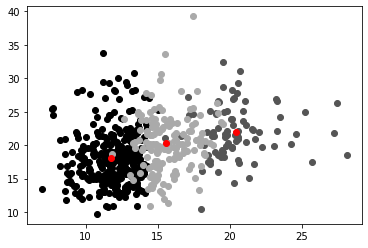

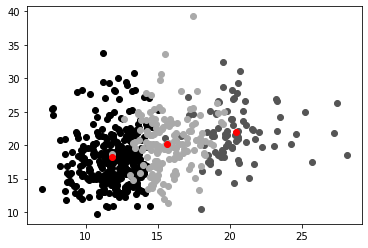

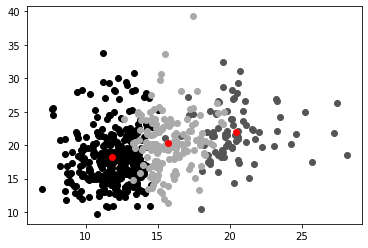

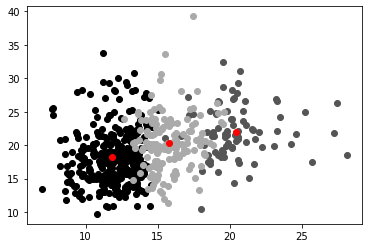

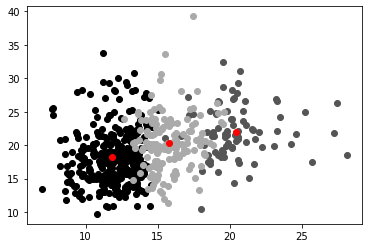

In [ ]:
centroids, assignments = k_means_plotting(data, 3)

In [ ]:
def plot(data, assignments, centroids, k):
  plt.figure
  for y in range(k):
    points_in_cluster = data[np.where(assignments == y)[0]]
    plt.scatter(points_in_cluster[:, 0], points_in_cluster[:, 1], c=[0+y/k,0+y/k,0+y/k])
  plt.scatter(centroids[:, 0], centroids[:, 1], c='r')
  plt.show